# Fundamentos de la Programación (Grado en Ingeniería de la Salud)
## Ejercicio "Black Friday" (1 de febrero de 2019)

Antes de empezar, ejecutaremos la siguiente celda con las importaciones necesarias para poder realizar el ejercicio:

In [1]:
import csv
from matplotlib import pyplot as plt
from collections import namedtuple

## 1. Carga de datos (0.75 puntos)

Tomaremos los datos de un fichero de entrada llamado <code>black_friday.csv</code> en el que se encuentran registrados datos de compras realizadas durante un _black friday_. El fichero se encuentra en la carpeta <code>./data</code>. Cada línea del fichero de entrada contiene las siguientes informaciones:

- **Gender:** sexo del comprador (<code>M</code> o <code>F</code>)
- **Age:** edad del comprador (uno de estos rangos: <code>0-17</code>, <code>18-25</code>, <code>26-35</code>, <code>36-45</code>,<code>46-50</code>, <code>51-55</code>, <code>55+</code>)
- **Marital_Status:** estado civil del comprador
- **Purchase:** importe de la compra

He aquí un fragmento con las primeras líneas del fichero de entrada:

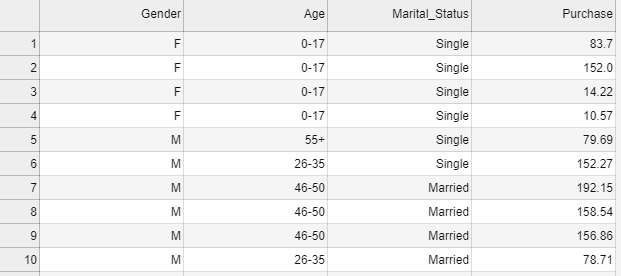

La primera función que implementaremos será la de lectura. Será la encargada de leer los datos del fichero de entrada y cargarlos en una lista de tuplas:

In [9]:
Compra = namedtuple('Compra', 'genero edad estado importe')

def lee_compras(fichero):
    ''' Lee el fichero de entrada y devuelve una lista de registros
    
    ENTRADA:
       - fichero: nombre del fichero de entrada
    SALIDA:
       - lista de registros -> [Compra(str, str, str, float)]

    Hay que transformar ciertos elementos de la entrada en valores numéricos
    para que puedan ser procesados posteriormente.
    '''
    registros = []
    with open(fichero, 'r', encoding='utf-8') as f:
        lector = csv.reader(f)
        next(lector)
        registros = [Compra(genero, edad, estado, float(importe),)
                    for genero, edad, estado, importe in lector]
    return registros

In [10]:
# Test de la función lee_compras
REGISTROS = lee_compras('./data/black_friday.csv')

# La salida esperada de la siguiente instrucción es: 
#    537577 [Compra(genero='F', edad='0-17', estado='Single', importe=83.7), 
#            Compra(genero='F', edad='0-17', estado='Single', importe=152.0)]
print(len(REGISTROS), REGISTROS[:2])

537577 [Compra(genero='F', edad='0-17', estado='Single', importe=83.7), Compra(genero='F', edad='0-17', estado='Single', importe=152.0)]


## 2. Consulta y filtrado (7.25 puntos)

Una vez que hemos cargado los datos en una estructura en memoria ya podemos empezar a procesarlos. En esta sección implementaremos algunas funciones de consulta y filtrado que nos permitirán trabajar con ellos.

La primera función que implementaremos se llama <code>proporcion_por_edad</code>. La función toma una lista de tuplas de registros y calcula qué proporción de esas compras está realizada por el segmento de edad que recibe como parámetro:

In [4]:
def proporcion_por_edad(registros, rango_edad):
    ''' Proporción de compras del rango de edad
    
    ENTRADA:
       - registros: lista de registros -> [Compra(str, str, str, float)]
       - rango_edad: del que se calculará la proporción -> str
    SALIDA:
       - proporción de compras -> float
    '''
    total = len(registros)
    en_rango = len([r for r in registros if r.edad==rango_edad])
    return en_rango/total

In [5]:
# Test de la función proporcion_por_edad

# La salida esperada de las siguientes instrucciones es: 
# 0.027357941280969984
# 0.18161863323765712
# 0.39936604430621103
# 0.19996949274243503
# 0.08282720428887397
# 0.0699769521389494
# 0.038883732004903485

print(proporcion_por_edad(REGISTROS,'0-17'))
print(proporcion_por_edad(REGISTROS,'18-25'))
print(proporcion_por_edad(REGISTROS,'26-35'))
print(proporcion_por_edad(REGISTROS,'36-45'))
print(proporcion_por_edad(REGISTROS,'46-50'))
print(proporcion_por_edad(REGISTROS,'51-55'))
print(proporcion_por_edad(REGISTROS,'55+'))

0.027357941280969984
0.18161863323765712
0.39936604430621103
0.19996949274243503
0.08282720428887397
0.0699769521389494
0.038883732004903485


La siguiente función se llama <code>filtra_por_genero_y_edad</code>. Toma una lista de registros, una lista de géneros y una lista de rangos de edad. Deberá seleccionar solamente aquellos registros que pertenezcan a los géneros y edades  indicadas.

In [6]:
def filtra_por_genero_y_edad(registros, generos, edades):
    ''' Selecciona registros por género y edad
    
    ENTRADA:
       - registros: lista de registros -> [Compra(str, str, str, float)]
       - generos: lista de generos a seleccionar -> [str]
       - edades: lista de rangos de edades a seleccionar -> [str]
    SALIDA:
       - lista de registros seleccionados -> [Compra(str, str, str, float)]
    '''
    filtrados = [r for r in registros if r.genero in generos and r.edad in edades]
    return filtrados

In [7]:
# Test de la función filtra_por_genero_y_edad
generos = ['F']
edades = ['36-45', '45-50'] 
filtrados = filtra_por_genero_y_edad(REGISTROS, generos, edades)

# La salida esperada de la siguiente instrucción es: 
#    26420 [Compra(genero='F', edad='36-45', estado='Married', importe=163.52), 
#           Compra(genero='F', edad='36-45', estado='Married', importe=88.86)]
print(len(sorted(filtrados)), filtrados[:2])

26420 [Compra(genero='F', edad='36-45', estado='Married', importe=163.52), Compra(genero='F', edad='36-45', estado='Married', importe=88.86)]


La tercera función se llama <code>filtra_por_importe</code>. Toma una lista de compras y produce como salida una lista de registros con las compras que estén dentro de un rango de importes:


In [8]:
def filtra_por_importe(registros, minimo=None, maximo=None):
    ''' Selecciona las compras que están en un rango de importes
    
    ENTRADA:
       - registros: lista de registros -> [Compra(str, str, str, float)]
       - minimo: importe mínimo de los registros a seleccionar -> float
       - maximo: importe máximo de los registros a seleccionar -> float
    SALIDA:
       - lista de registros seleccionados -> [Compra(str, str, str, float)]
       
    Si los valores 'minimo' o 'maximo' son 'None' se sustituirán respectivamente por el máximo y el mínimo de
    todos los importes.
    '''
    importes = {r.importe for r in registros}
    if minimo==None:
        minimo = min(importes)
    if maximo==None:
        maximo = max(importes)
    return [r for r in registros if minimo<=r.importe<=maximo]

In [9]:
# Test de la función filtra_por_importe
baratas = filtra_por_importe(REGISTROS,maximo=20)
medias = filtra_por_importe(REGISTROS,20.01,199.99)
caras = filtra_por_importe(REGISTROS,200)

# La salida esperada de las siguientes instrucciones es: 
#    23497 [Compra(genero='F', edad='0-17', estado='Single', importe=14.22), 
#           Compra(genero='F', edad='0-17', estado='Single', importe=10.57)]
#   501559 [Compra(genero='F', edad='0-17', estado='Single', importe=83.7), 
#           Compra(genero='F', edad='0-17', estado='Single', importe=152.0)]
#    12521 [Compra(genero='M', edad='26-35', estado='Single', importe=204.42), 
#           Compra(genero='M', edad='26-35', estado='Single', importe=209.61)]
print(len(baratas), baratas[:2])
print(len(medias), medias[:2])
print(len(caras), caras[:2])

23497 [Compra(genero='F', edad='0-17', estado='Single', importe=14.22), Compra(genero='F', edad='0-17', estado='Single', importe=10.57)]
501559 [Compra(genero='F', edad='0-17', estado='Single', importe=83.7), Compra(genero='F', edad='0-17', estado='Single', importe=152.0)]
12521 [Compra(genero='M', edad='26-35', estado='Single', importe=204.42), Compra(genero='M', edad='26-35', estado='Single', importe=209.61)]


La siguiente función de esta sección se llama <code>compra_media_por_edad</code>. Toma como entrada una lista de registros, y produce como salida un diccionario cuyas claves son los distintos rangos de edad, y los valores son los importes medios de las compras realizadas en ese segmento de edad.

In [10]:
def compra_media_por_edad(registros):
    ''' Crea un diccionario con el importe medio por rango de edad
    
    ENTRADA:
       - registros: lista de registros -> [Compra(str, str, str, float)]
    SALIDA:
       - diccionario con el importe medio -> {str: float}
    '''
    importes_medios = dict()
    edades = {r.edad for r in registros}
    for edad in edades:
        importes = [r.importe for r in registros if r.edad == edad]
        importes_medios[edad] = sum(importes)/len(importes)
    return importes_medios

In [11]:
# Test de la función compra_media_por_edad
importes_medios = compra_media_por_edad(REGISTROS)

# La salida esperada de la siguiente instrucción es: 
#   93.1458897014295 96.20616619703335
print(importes_medios['26-35'], importes_medios['51-55'])

93.1458897014295 96.20616619703335


## 3. Visualización (2 puntos)

La función de visualización que implementaremos será <code>distribucion_por_edades</code>. Toma como entrada una lista de registros y genera un diagrama de tarta con la distribución del número de compras por rango de edad. 

In [12]:
def distribucion_por_edades(registros):
    ''' Genera un diagrama de tarta con la distribución del número de compras por rango de edad
        
        ENTRADA:
           - registros: lista de registros -> [Compra(str, str, str, float)]
        SALIDA EN PANTALLA:
           - diagrama de tarta con la proporción de compras
           
        Se usarán las siguientes instrucciones matplotlib para generar la curva:
            fig1, ax1 = plt.subplots()
            ax1.pie(compras, labels=edades, shadow=True, startangle=90)
            ax1.axis('equal')
            plt.show()
        Donde las dos variables usadas significan lo siguiente:
            - edades: lista ordenada con los distintos rangos de edades
            - compras: lista (alineada con la anterior) con el número de compras por cada rango de edad
    '''
    edades = sorted(list({r.edad for r in registros}))
    compras = []
    for edad in edades:
        compras.append(len([r for r in registros if r.edad==edad]))

    fig1, ax1 = plt.subplots()
    ax1.pie(compras, labels=edades, shadow=True, startangle=90)
    ax1.axis('equal')
    plt.show()


La salida de la siguiente celda de test debería ser la siguiente:
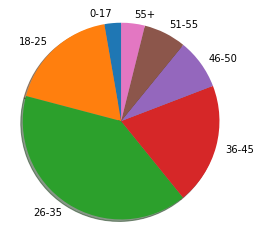

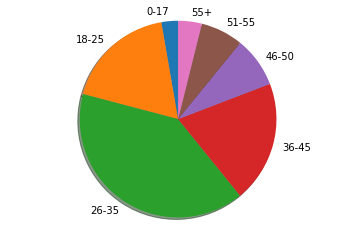

In [13]:
# Test de la función distribucion_por_edades
distribucion_por_edades(REGISTROS)